In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import time
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from steps.ingest_data import IngestData
from steps.tokenizer import CharacterTokenizer

In [3]:
from steps.utils import get_batches

In [4]:
lines = IngestData("Data/").get_data()

In [5]:
tokenizer = CharacterTokenizer(lines)

In [6]:
MASTER_CONFIG = {
    "vocab_size": len(tokenizer.vocab),
}

In [7]:
dataset = torch.tensor(tokenizer.encode(lines), dtype=torch.int8)

In [8]:
MASTER_CONFIG.update({
    'batch_size': 8,
    'context_window': 16
})

In [9]:
xs, ys = get_batches(dataset, 'train', MASTER_CONFIG['batch_size'], MASTER_CONFIG['context_window'])

[(tokenizer.decode(xs[i].tolist()), tokenizer.decode(ys[i].tolist())) for i in range(len(xs))]

[('\nCAMILLO:\nWho ha', 'CAMILLO:\nWho hav'),
 ('whither fly the ', 'hither fly the g'),
 (' heart.\n\nGLOUCES', 'heart.\n\nGLOUCEST'),
 (' a little while ', 'a little while t'),
 ('y humble seat co', ' humble seat con'),
 ('almost thoroughl', 'lmost thoroughly'),
 ('conquest of this', 'onquest of this '),
 ('ood Capulet,--wh', 'od Capulet,--whi')]

In [10]:
MASTER_CONFIG.update({
    'd_model': 128,
})

In [11]:
MASTER_CONFIG.update({
    'epochs': 1000,
    'log_interval': 10,
    'batch_size': 32,
})

In [12]:
MASTER_CONFIG.update({
    'n_heads': 8,
})

In [13]:
from steps.models_training import llama
from steps.utils import generate

In [14]:
model = llama(MASTER_CONFIG)

model params: 559681


Epoch 0 | val loss 4.106 | Time 0.136 | ETA in seconds 13.622
Epoch 10 | val loss 3.055 | Time 1.071 | ETA in seconds 106.062
Epoch 20 | val loss 2.825 | Time 1.065 | ETA in seconds 104.331
Epoch 30 | val loss 2.729 | Time 0.997 | ETA in seconds 96.694
Epoch 40 | val loss 2.652 | Time 1.044 | ETA in seconds 100.233
Epoch 50 | val loss 2.623 | Time 1.144 | ETA in seconds 108.698
Epoch 60 | val loss 2.561 | Time 1.116 | ETA in seconds 104.872
Epoch 70 | val loss 2.506 | Time 1.127 | ETA in seconds 104.854
Epoch 80 | val loss 2.490 | Time 1.100 | ETA in seconds 101.189
Epoch 90 | val loss 2.466 | Time 1.543 | ETA in seconds 140.444
Epoch 100 | val loss 2.436 | Time 1.514 | ETA in seconds 136.287
Epoch 110 | val loss 2.436 | Time 1.528 | ETA in seconds 135.958
Epoch 120 | val loss 2.404 | Time 1.057 | ETA in seconds 92.982
Epoch 130 | val loss 2.388 | Time 1.114 | ETA in seconds 96.884
Epoch 140 | val loss 2.321 | Time 1.185 | ETA in seconds 101.942
Epoch 150 | val loss 2.373 | Time 1.581 

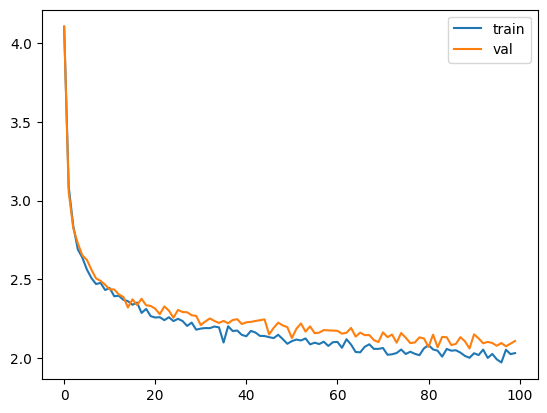

In [15]:
model,p = model.train(dataset,print_logs=True)

In [16]:
generate(model, tokenizer=tokenizer,config=MASTER_CONFIG)

['\nTOLO:\nSelat;\nCil andy ath\nWher',
 "\n\nOLIXESSTER:\nI's come, is levo",
 '\nFor he torth to groantle be so',
 "\nOF FORYCYORK:\n'Tathall, where ",
 '\nKING!\n\nDORI\nOKE:\nCome, loorfor']